In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

# Reading the CSV file
The input has 8 features and 887 samples:
- Survived (1 for survived; 0 for died)
- Pclass (First Class, Second Class, Third Class)
- Name
- Sex
- Age
- Siblings/Spouses Aboard
- Parents/Children Aboard
- Fare

In [ ]:
X = pd.read_csv("https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv")
X.head(5)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [ ]:
X.shape

(887, 8)

# Analyze the data
Let's investigate the data.

Some noticable points:
- The minimum age in the input was 0.42
- The mean and the median of age is close, showing that the distribution of passengers' age were lightly skewed to right and was nearly symmetrical. This means for every person younger than the median/mean, there is likely a person older than the median/mean with the same age difference
- Most people owned a Third Class ticket
- Most people did not survived (50% of the passengers died)
- The 75th percentile of the fare is just a little bit cheaper than the mean. This means that while most ticket cost under 31, some of them cost very high

Some hypotheses:
- Female passengers had higher survival rates
- Children had higher survival rates
- Siblings/Spouses Aboard and Parents/Children Aboard slightly correlates to survival rates
- Higher class tickets (First Class is the highest) cost more and had higher survival rates

In [ ]:
X.describe()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.32920


There are no missing values in this dataset.

In [ ]:
X.isna().sum()

,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
Siblings/Spouses Aboard,0
Parents/Children Aboard,0
Fare,0


## Survival rates
The pie chart below shows that their was 38.6% passengers in the dataset survived the incident.

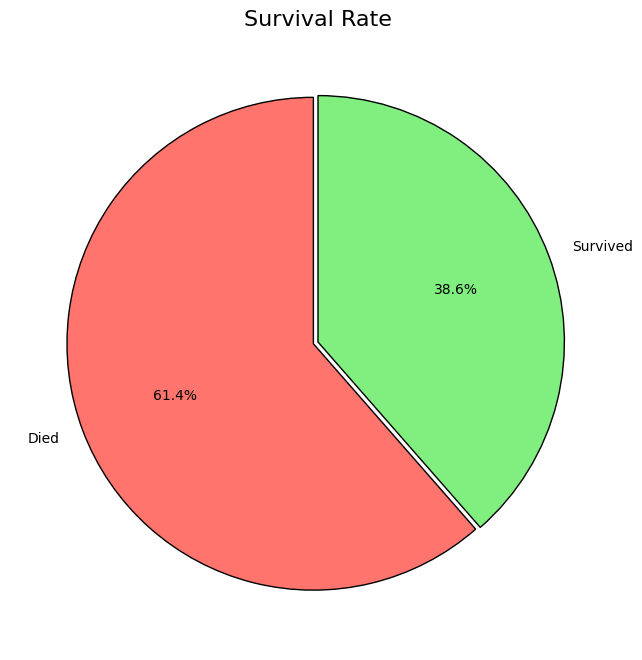

In [ ]:
survival_cnt = X["Survived"].value_counts().sort_index()
labels = ["Died", "Survived"]
colors = ["#ff746c", "#80ef80"]
plt.figure(figsize=(8, 8))
explode = (0.02, 0)
plt.pie(survival_cnt, labels=labels, colors=colors, autopct="%1.1f%%", startangle=90, explode=explode, wedgeprops={"edgecolor": "black"})
plt.title("Survival Rate", fontsize=16)
plt.show()

## Age Distribution
The plot confirms the earlier observation: the data is slightly skewed to the right with a nearly symmetrical shape. It also shows that most of the passengers were in the age of 20-40.

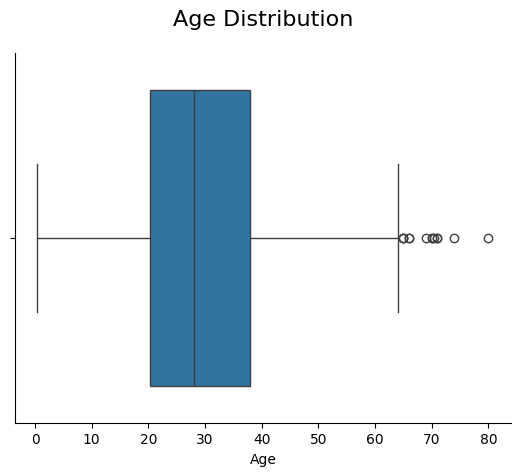

In [ ]:
sns.boxplot(x=X["Age"])
plt.title("Age Distribution", fontsize=16, pad=20)
sns.despine()

## Fares
There is considerable variation in ticket fares, even within the same passenger class. The most popular price range was 0 to 50.

<Axes: xlabel='Fare', ylabel='Count'>

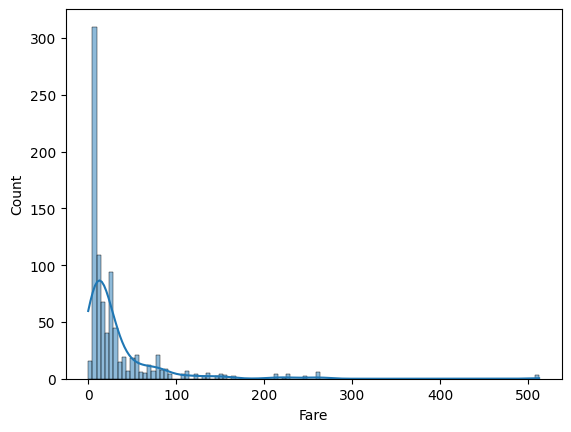

In [ ]:
sns.histplot(X["Fare"], kde=True)

Three tickets had fare exceeding 500, while the next most expensive options were below 300.

Several tickets across different classes shared identical fare amounts.

<Axes: xlabel='Pclass', ylabel='Fare'>

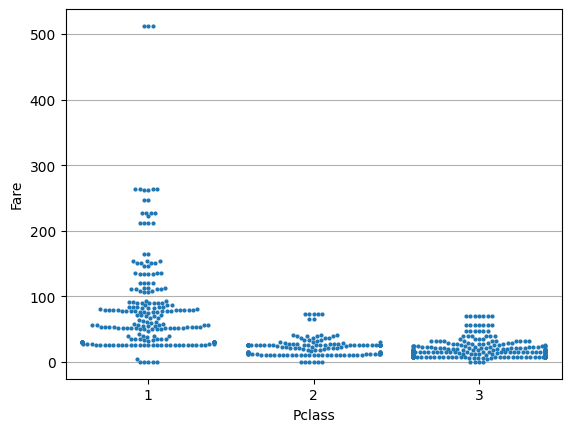

In [ ]:
plt.grid(True)
sns.swarmplot(data=X, x="Pclass", y="Fare", size=3)

However, it's clear that the higher class cost more.

Text(0.5, 1.0, 'Average fare of each Passenger Class')

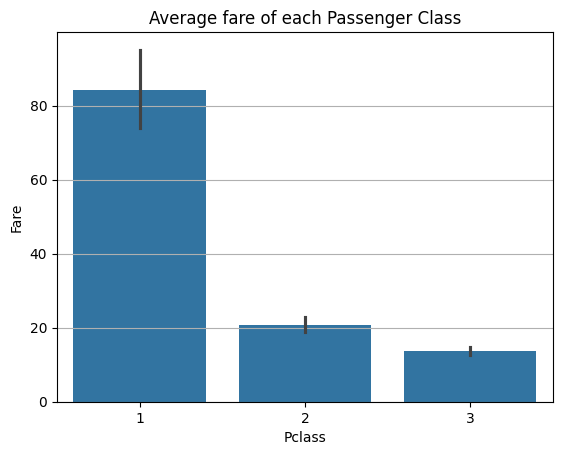

In [ ]:
plt.grid(True)
sns.barplot(data=X, x="Pclass", y="Fare", estimator=np.mean)
plt.title("Average fare of each Passenger Class")

The plots approve the observation made earlier about the price of the tickets. There were a variety of fares for the First Class, and most of them are higher than the median.

## Sex vs PClass
Through the following charts, we can observe that:
- Most people owned Third Class tickets
- There were more people on First Class than Second Class, suggesting that people aboard mostly choose to stay luxuriously or poorly
- While there were about 60% of males going on a Third Class (343 people), less than 50% of females went on a Third Class. Notably, there were about 30% of females going on a First Class. This means that on average, women held a higher class ticket than men

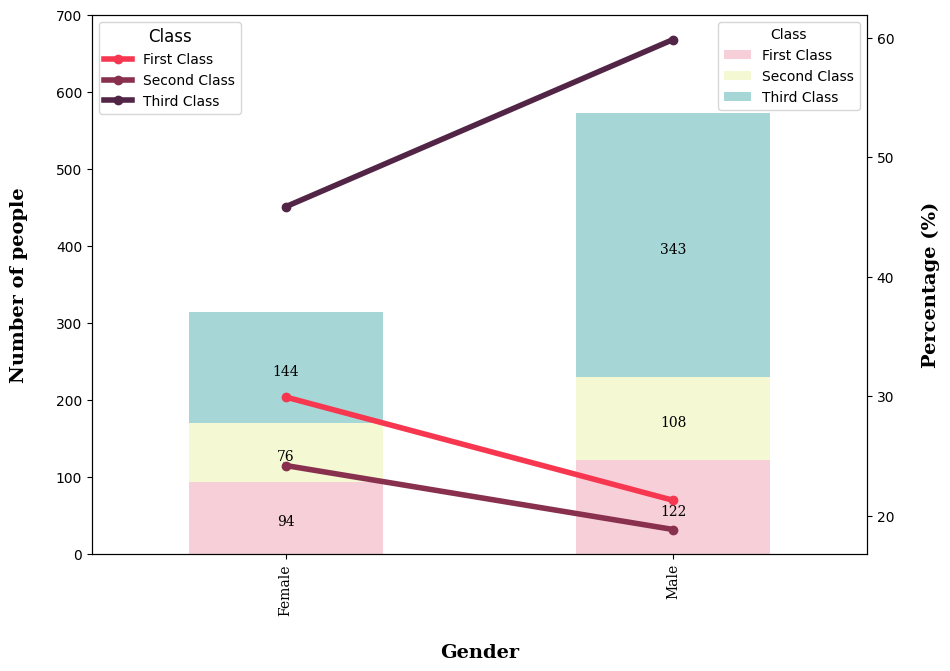

In [ ]:
#Bar graph for total number of people in each class of each gender
sex_pclass = pd.crosstab(X["Sex"], X["Pclass"])


gender = ["Female", "Male"]
x_pos = [0, 1]
y_pos = np.arange(0, 800, 100)
colors = ["#F7CFD8", "#F4F8D3", "#A6D6D6"]

ax = sex_pclass.plot(kind="bar", stacked=True, color=colors, figsize=(10, 7))

ax.set_xticks(x_pos, labels=gender, fontfamily="serif")
ax.set_yticks(y_pos)
ax.set_xlabel("Gender", fontfamily="serif", fontsize=14, labelpad=20, fontweight="bold")
ax.set_ylabel("Number of people", fontfamily="serif", fontsize=14, labelpad=20, fontweight="bold")
ax.legend(title="Class", labels=["First Class", "Second Class", "Third Class"])

for num in ax.containers:
  ax.bar_label(num, label_type="center", fontfamily="serif", padding=-3)


#Line graph for percentage of people in each class of each gender

#Scale down the classes to align with the columns
scaled_pclass = X["Pclass"].replace({1: 0, 2: 0.5, 3: 1})
sex_pclass_pct = pd.crosstab(X["Sex"], scaled_pclass)
X_temp = X.copy()
X_temp["ScaledPclass"] = scaled_pclass
sex_scaled = pd.crosstab(X_temp["Sex"], X_temp["ScaledPclass"])
total_females = sex_scaled.loc["female"].sum()
total_males = sex_scaled.loc["male"].sum()
sex_scaled.loc["female"] = sex_scaled.loc["female"].div(total_females)*100
sex_scaled.loc["male"] = sex_scaled.loc["male"].div(total_males)*100

ax2 = ax.twinx()
colors = ["#F7374F", "#88304E", "#522546"]
ax2 = sex_scaled.plot(kind="line", ax=ax2, linewidth=4, marker="o", color=colors)

ax2.set_ylabel("Percentage (%)", fontfamily="serif", fontsize=14, labelpad=20, fontweight="bold")
ax2.set_xlabel("Scaled Class", fontfamily="serif", fontsize=14, labelpad=20, fontweight="bold")
ax2.legend(title="Class", labels=["First Class", "Second Class", "Third Class"], title_fontsize=12, fontsize=10, loc="upper left")
ax2.set_xticks(x_pos, labels=gender, fontfamily="serif")

## Gender vs Survived
It is evident that female survival rates are very high, and only less than 1 in 5 males survived

([<matplotlib.patches.Wedge at 0x7e37b3c77d90>,
 [Text(-0.6470730759126573, -0.9506820890439309, 'Died'),
  Text(0.6189387340020827, 0.909348581981574, 'Survived')],
 [Text(-0.3657369559506324, -0.5373420503291783, '81.0%'),
  Text(0.33760294581931777, 0.49600831744449486, '19.0%')])

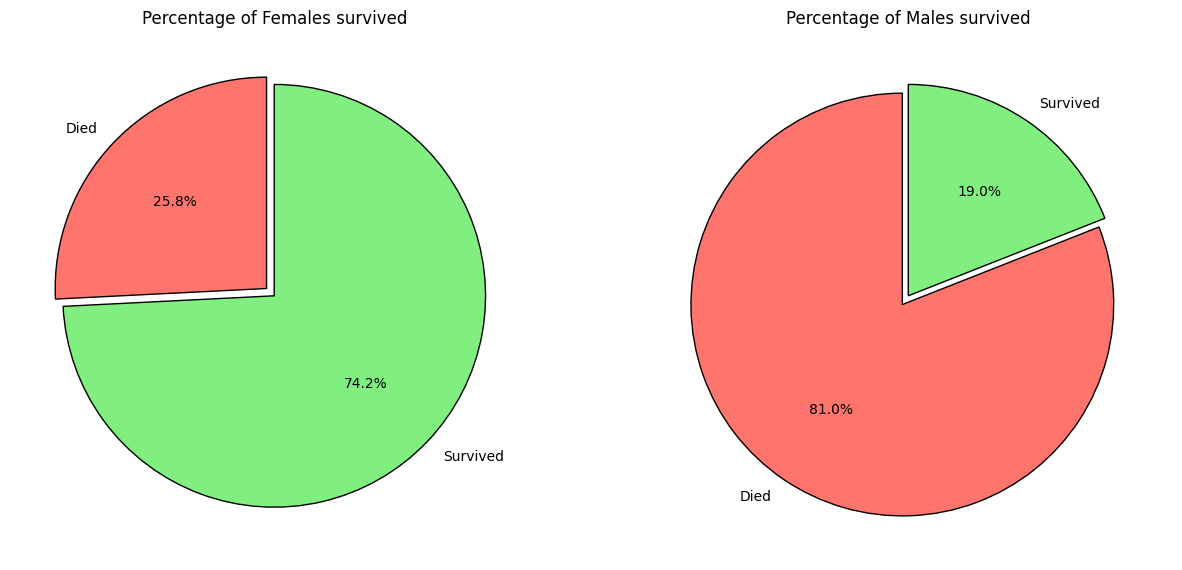

In [ ]:
fig, (plt1, plt2) = plt.subplots(1, 2, figsize=(15, 15))

f = X[X["Sex"]=="female"]
m = X[X["Sex"]=="male"]

f_survival_cnt = f["Survived"].value_counts().sort_index()
m_survival_cnt = m["Survived"].value_counts().sort_index()
labels = ["Died", "Survived"]
colors = ["#ff746c", "#80ef80"]
explode = (0.05, 0)
plt1.set_title("Percentage of Females survived")
plt2.set_title("Percentage of Males survived")
plt1.pie(f_survival_cnt, labels=labels, colors=colors, autopct="%1.1f%%", startangle=90, explode=explode, wedgeprops={"edgecolor": "black"})
plt2.pie(m_survival_cnt, labels=labels, colors=colors, autopct="%1.1f%%", startangle=90, explode=explode, wedgeprops={"edgecolor": "black"})

## Pclass vs Survived
It can be seen that the higher class passengers have higher survival rates.

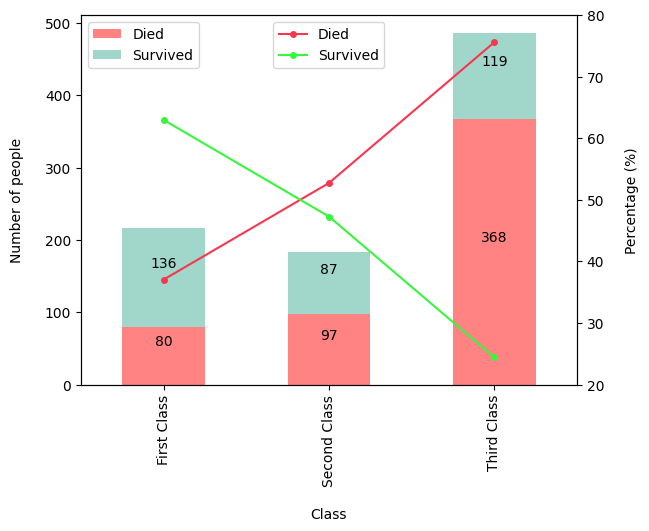

In [ ]:
# Bar graph
survived_pclass = pd.crosstab(X["Pclass"], X["Survived"])

x_pclass = ["First Class", "Second Class", "Third Class"]
x_coord = [0, 1, 2]

pl1 = survived_pclass.plot(kind="bar", stacked=True, color=["#FF8383", "#A1D6CB"])
pl1.set_xticks(x_coord, labels=x_pclass)
pl1.set_xlabel("Class", labelpad=15)
pl1.set_ylabel("Number of people", labelpad=15)
pl1.legend(labels=["Died", "Survived"])

# Line graph for percentage of people survived

# Number of people in each bar
for i in pl1.containers:
  pl1.bar_label(i, label_type="center", padding=10)

# Scale down the classes to align with the columns
adj_df = survived_pclass.copy()
adj_df.index = adj_df.index.map({1: 0, 2: 1, 3: 2})
pclass_totals = adj_df.sum(axis=1)
adj_df_pct = adj_df.div(pclass_totals, axis=0)*100

y2 = np.arange(20, 90, 10)
pl2 = pl1.twinx()
pl2 = adj_df_pct.plot(kind="line", ax=pl2, marker="o", color=["#F7374F", "#37f73d"], markersize=4)
pl2.set_ylabel("Percentage (%)", labelpad=15)
pl2.legend(labels=["Died", "Survived"], loc="upper center")
pl2.set_yticks(y2)

## Age vs Survived
While the 0-9 age group had close to 60% survival rate, all other age groups - except for 80-89 which had an unreliable number of one occurrence - do not show any trend and fluctuate around ~25-40%.

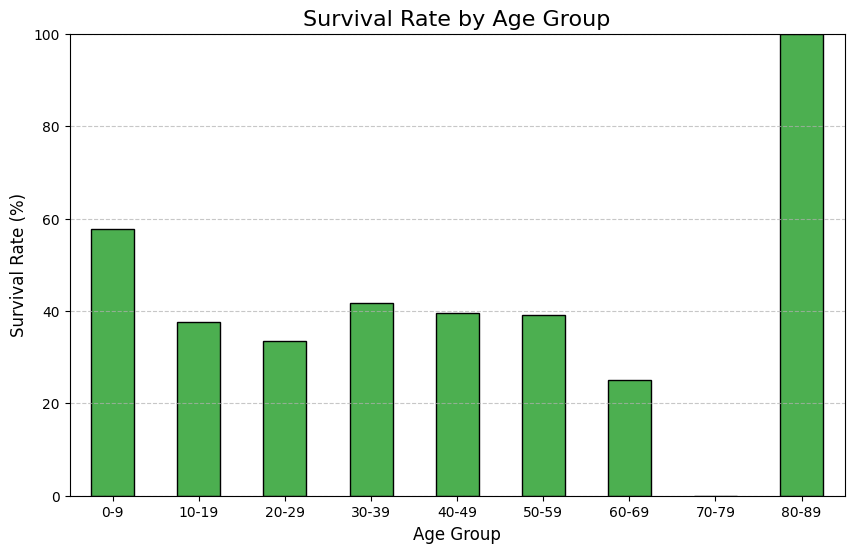

In [71]:
bins = list(range(0, 91, 10))

labels = [f"{i}-{i+9}" for i in range(0, 81, 10)]

age_groups = X

age_groups["AgeGroup"] = pd.cut(X["Age"], bins=bins, labels=labels, right=False)

age_survived = age_groups.groupby("AgeGroup")["Survived"].mean()*100

plt.figure(figsize=(10, 6))
age_survived.plot(kind="bar", color="#4CAF50", edgecolor="black")

plt.title("Survival Rate by Age Group", fontsize=16)
plt.xlabel("Age Group", fontsize=12)
plt.ylabel("Survival Rate (%)", fontsize=12)
plt.xticks(rotation=0)
plt.ylim(0, 100)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

Let's take gender into account.

Despite the survival rate of boys from 0-9 was higher than girls, all other age groups had a huge difference in survival rate between boys and girls. We can say that gender mattered a lot more than ages.

Index(['AgeGroup', 'Sex', 'Survived'], dtype='object')


<Figure size 1000x600 with 0 Axes>

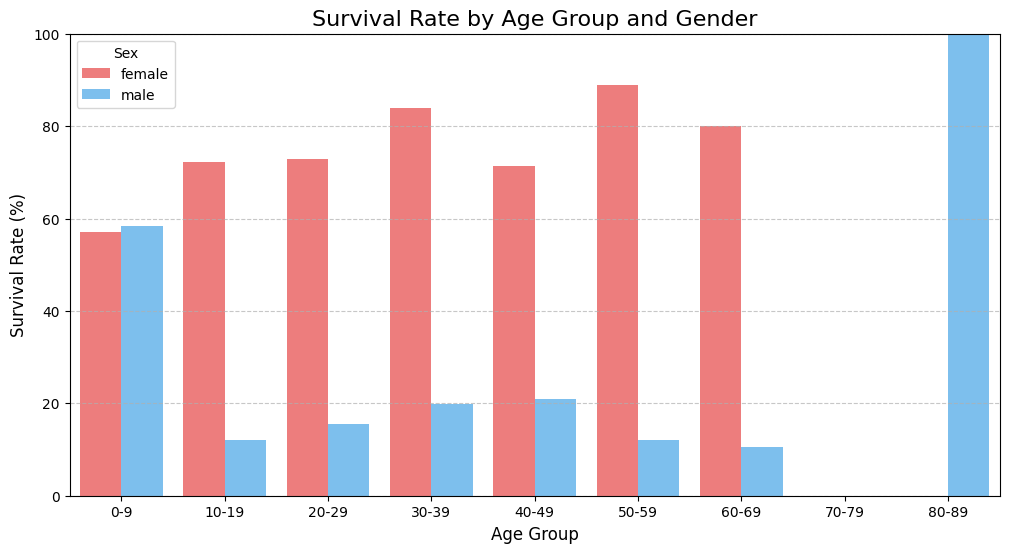

In [72]:
age_groups = X

age_groups["AgeGroup"] = pd.cut(X["Age"], bins=bins, labels=labels, right=False)

age_survived = age_groups.groupby(["AgeGroup", "Sex"])["Survived"].mean().reset_index()
print(age_survived.columns)

age_survived["Survived"] *= 100

plt.figure(figsize=(10, 6))
plt.figure(figsize=(12, 6))
sns.barplot(data=age_survived, x="AgeGroup", y="Survived", hue="Sex", palette=["#ff6b6b", "#6bc2ff"])

plt.title("Survival Rate by Age Group and Gender", fontsize=16)
plt.xlabel("Age Group", fontsize=12)
plt.ylabel("Survival Rate (%)", fontsize=12)
plt.ylim(0, 100)
plt.legend(title="Sex")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()


## Number of members vs Survival rates
It's interesting that the lower the number of siblings/spouses and parents/children aboard with a person, the higher the survival rate was. However, it's must be mentioned that when a person has 3 siblings, then these three corresponding people might have the same 3 siblings number. When one of them survived while three other died, it can creates unfairness in the data.

<Axes: xlabel='Parents/Children Aboard'>

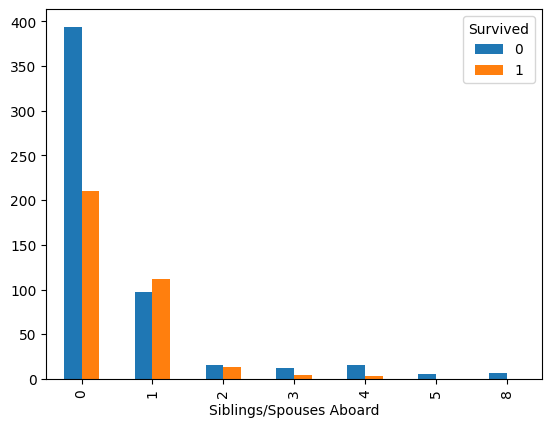

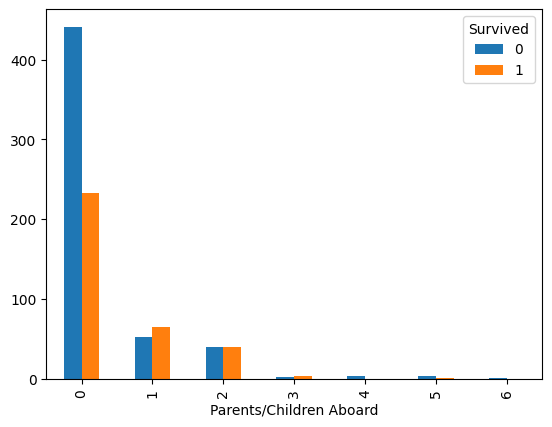

In [ ]:
a = pd.crosstab(X["Siblings/Spouses Aboard"], X["Survived"])
b = pd.crosstab(X["Parents/Children Aboard"], X["Survived"])

a.plot(kind="bar")
b.plot(kind="bar")

# EDA Conclusion
Let's look at the correlation matrix to conclude the findings.
- Sex affects survival rate the most, following by Pclass correlation (since it has a negative correlation -> the lower the passenger class is, the higher the survival rate is). All other feathers has weak to very weak correlation.
- While the fare varied a lot, Pclass has a strong negative correlation with the Fare. This means that the higher the fare is, the better the passengers class is.
- Similarly, Pclass has a moderate negative correlation with ages. This means older people tended to have better class.

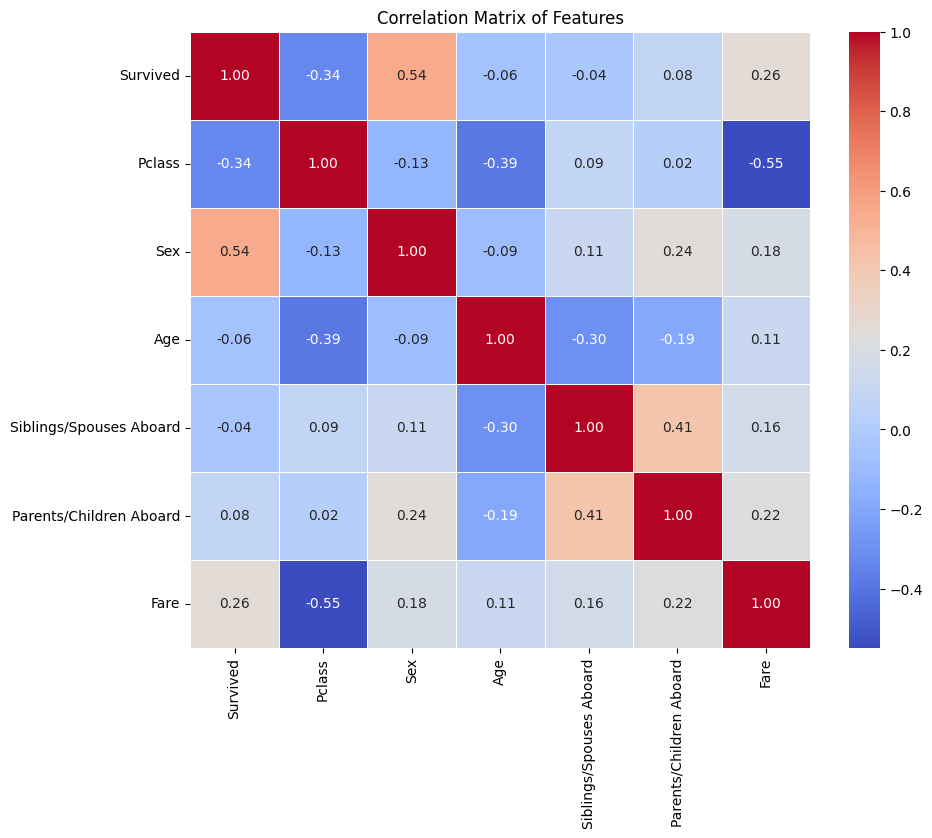

In [ ]:
cor = X.copy()
cor["Sex"] = cor["Sex"].map({"male": 0, "female": 1})
cor = cor.select_dtypes(include=['float64', 'int64'])
corr_matrix = cor.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()